In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =pd.read_csv("/content/drive/MyDrive/Financials.csv")
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,$888.00,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",01/06/2014,6,June,2014


In [3]:
df.shape

(700, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Segment                700 non-null    object
 1   Country                700 non-null    object
 2    Product               700 non-null    object
 3    Discount Band         700 non-null    object
 4    Units Sold            700 non-null    object
 5    Manufacturing Price   700 non-null    object
 6    Sale Price            700 non-null    object
 7    Gross Sales           700 non-null    object
 8    Discounts             700 non-null    object
 9     Sales                700 non-null    object
 10   COGS                  700 non-null    object
 11   Profit                700 non-null    object
 12  Date                   700 non-null    object
 13  Month Number           700 non-null    int64 
 14   Month Name            700 non-null    object
 15  Year                   

In [5]:
df.columns

Index(['Segment', 'Country', ' Product ', ' Discount Band ', ' Units Sold ',
       ' Manufacturing Price ', ' Sale Price ', ' Gross Sales ', ' Discounts ',
       '  Sales ', ' COGS ', ' Profit ', 'Date', 'Month Number',
       ' Month Name ', 'Year'],
      dtype='object')

❌***Error identified: There are leading or trailing spaces. Why do they have to be removed though?***

In [6]:
# removing any leading/trailing spaces
df.columns = df.columns.str.strip()
df.columns

Index(['Segment', 'Country', 'Product', 'Discount Band', 'Units Sold',
       'Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts',
       'Sales', 'COGS', 'Profit', 'Date', 'Month Number', 'Month Name',
       'Year'],
      dtype='object')

In [7]:
df.head(10)

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,$888.00,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",01/06/2014,6,June,2014
5,Government,Germany,Carretera,None,"$1,513.00",$3.00,$350.00,"$5,29,550.00",$-,"$5,29,550.00","$3,93,380.00","$1,36,170.00",01/12/2014,12,December,2014
6,Midmarket,Germany,Montana,None,$921.00,$5.00,$15.00,"$13,815.00",$-,"$13,815.00","$9,210.00","$4,605.00",01/03/2014,3,March,2014
7,Channel Partners,Canada,Montana,None,"$2,518.00",$5.00,$12.00,"$30,216.00",$-,"$30,216.00","$7,554.00","$22,662.00",01/06/2014,6,June,2014
8,Government,France,Montana,None,"$1,899.00",$5.00,$20.00,"$37,980.00",$-,"$37,980.00","$18,990.00","$18,990.00",01/06/2014,6,June,2014
9,Channel Partners,Germany,Montana,None,"$1,545.00",$5.00,$12.00,"$18,540.00",$-,"$18,540.00","$4,635.00","$13,905.00",01/06/2014,6,June,2014


In [8]:
df = df.rename(columns={
    'Segment': 'segment',
    'Country': 'country',
    'Product': 'product',
    'Discount Band': 'discount_band',
    'Units Sold': 'units_sold',
    'Manufacturing Price': 'manufacturing_price',
    'Sale Price': 'sale_price',
    'Gross Sales': 'gross_sales',
    'Discounts': 'discounts',
    'Sales': 'sales',
    'COGS': 'cogs',
    'Profit': 'profit',
    'Date': 'date',
    'Month Number': 'month_number',
    'Month Name': 'month_name',
    'Year': 'year',
})
df.head()

,segment,country,product,discount_band,units_sold,manufacturing_price,sale_price,gross_sales,discounts,sales,cogs,profit,date,month_number,month_name,year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,$888.00,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",01/06/2014,6,June,2014


In [9]:
# Assuming the columns to clean are numerical columns
somecols = df.select_dtypes(include=['object']).columns  # Automatically select object columns

for col in somecols:
    df[col] = df[col].str.replace(r'\$', '', regex=True)  # Remove '$'
    df[col] = df[col].str.replace(r'\-', '0', regex=True)  # Replace '-' with '0'
    df[col] = df[col].str.replace(r',', '', regex=True)    # Remove commas
df.head(3)

,segment,country,product,discount_band,units_sold,manufacturing_price,sale_price,gross_sales,discounts,sales,cogs,profit,date,month_number,month_name,year
0,Government,Canada,Carretera,None,1618.50,3.00,20.00,32370.00,0,32370.00,16185.00,16185.00,01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,1321.00,3.00,20.00,26420.00,0,26420.00,13210.00,13210.00,01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,2178.00,3.00,15.00,32670.00,0,32670.00,21780.00,10890.00,01/06/2014,6,June,2014


In [10]:
for col in somecols:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to float64

# Confirm the datatypes have been changed
print(df.dtypes)

segment                float64
country                float64
product                float64
discount_band          float64
units_sold             float64
manufacturing_price    float64
sale_price             float64
gross_sales            float64
discounts              float64
sales                  float64
cogs                   float64
profit                 float64
date                   float64
month_number             int64
month_name             float64
year                     int64
dtype: object


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   segment              0 non-null      float64
 1   country              0 non-null      float64
 2   product              0 non-null      float64
 3   discount_band        0 non-null      float64
 4   units_sold           700 non-null    float64
 5   manufacturing_price  700 non-null    float64
 6   sale_price           700 non-null    float64
 7   gross_sales          700 non-null    float64
 8   discounts            700 non-null    float64
 9   sales                700 non-null    float64
 10  cogs                 700 non-null    float64
 11  profit               642 non-null    float64
 12  date                 0 non-null      float64
 13  month_number         700 non-null    int64  
 14  month_name           0 non-null      float64
 15  year                 700 non-null    int

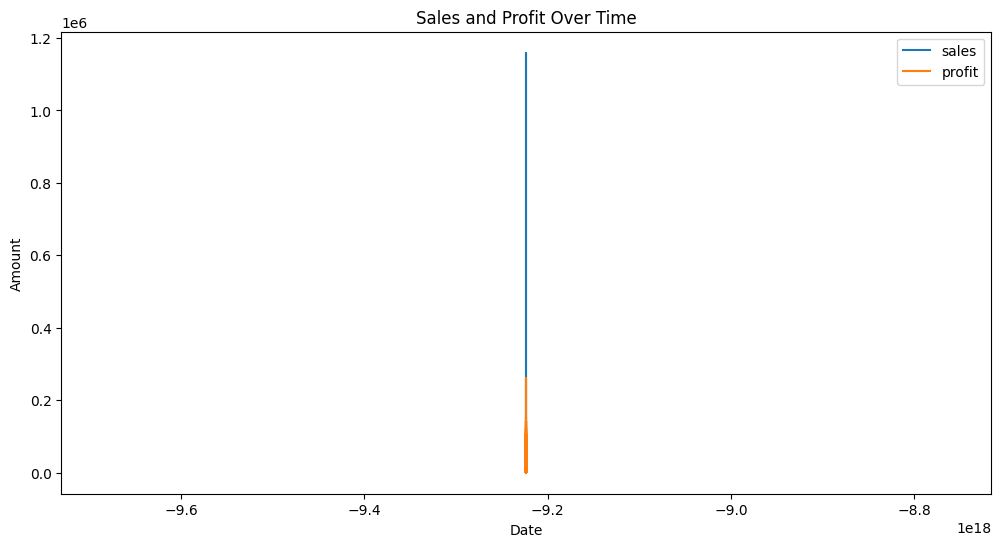

In [12]:
# Converting the 'Date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Plot Sales and Profit over time
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['sales'], label='sales')
plt.plot(df['date'], df['profit'], label='profit')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.title('Sales and Profit Over Time')
plt.legend()
plt.show()

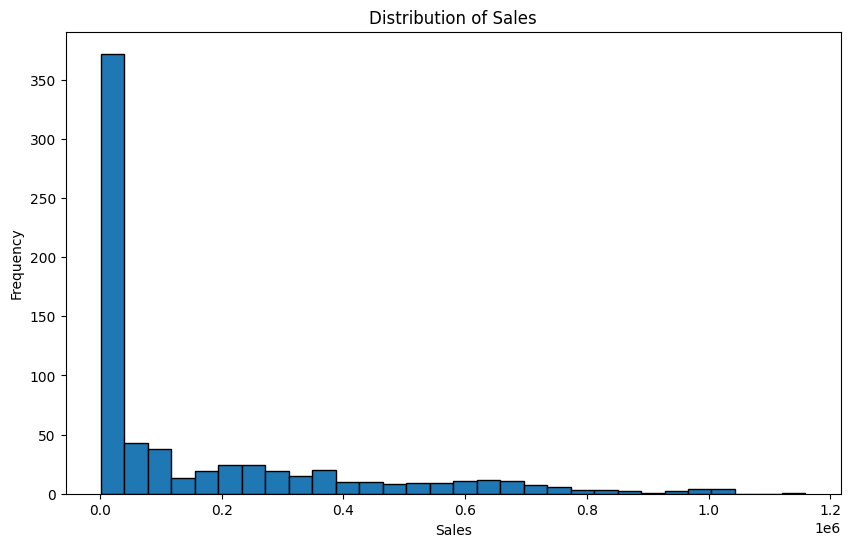

In [13]:
# Numerical feature 1: Histogram of Sales
plt.figure(figsize=(10, 6))
plt.hist(df['sales'].dropna(), bins=30, edgecolor='black')
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()
plt.close()

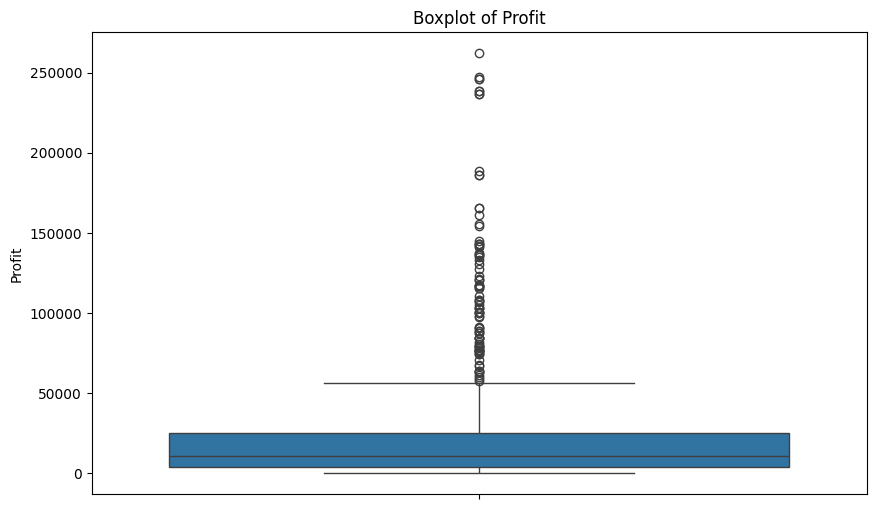

In [14]:
# Numerical feature 2: Boxplot of Profit
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['profit'].dropna())
plt.title('Boxplot of Profit')
plt.ylabel('Profit')
plt.show()
plt.close()

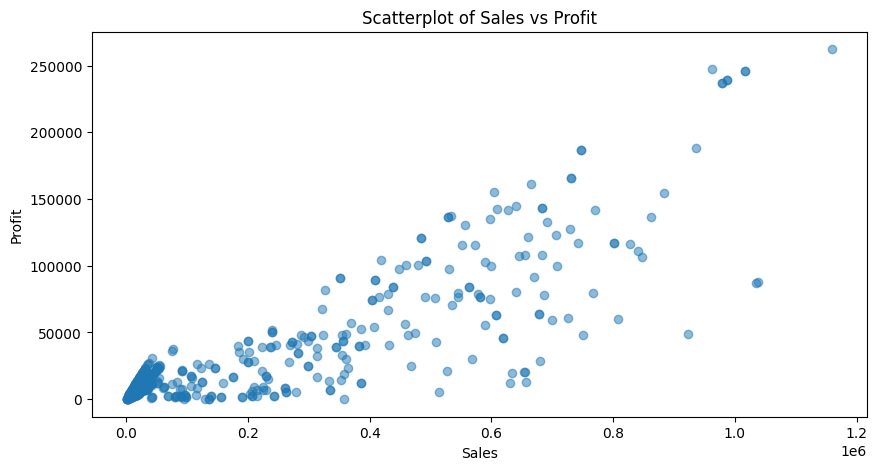

In [15]:
# Example scatterplot between 'Sales' and 'Profit'
plt.figure(figsize=(10, 5))
plt.scatter(df['sales'], df['profit'], alpha=0.5)
plt.title('Scatterplot of Sales vs Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.show()

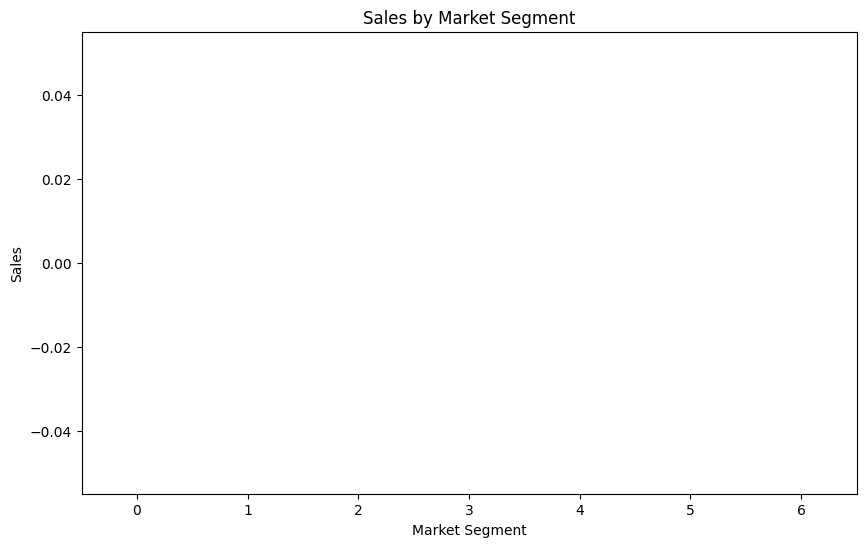

In [18]:
# Example: Sales by Market Segment
plt.figure(figsize=(10, 6))
sns.barplot(x='segment', y='sales', data=df)
plt.title('Sales by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Sales')
plt.show()



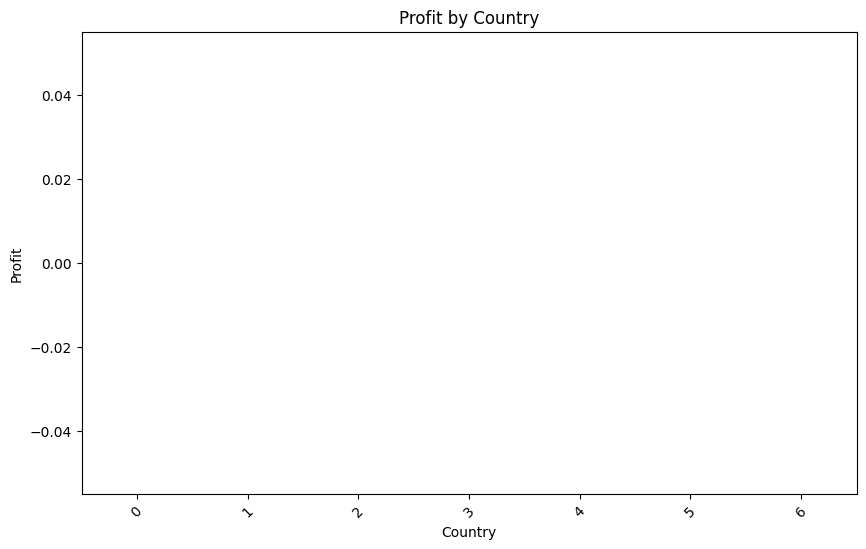

In [20]:
# Example: Profit by Country/Region
plt.figure(figsize=(10, 6))
sns.barplot(x='country', y='profit', data=df)
plt.title('Profit by Country')
plt.xlabel('Country')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.show()
